# Telco Customer Churn Analysis
Dataset:
Obtained from Kaggle https://www.kaggle.com/blastchar/telco-customer-churn

## Problem Definition:
In the commercial world, it is important to understand customer retention and how the rate of customers leaving the business (churn) relates to characteristics exhibited by the members. By analysing and understanding the behaviour of customers, retention programs can be devised and targeted towards customers most likely to churn. This optimises the company's use of resources by allowing them to focus their energy where it is has the most effect.

This project applies a churn analysis to a telecommunications provider using data sourced from Kaggle. In this example, certain information about the customer, services they subscribed to and other variables were used to predict whether a customer was likely to to churn. The total project consisted of an exploratory analysis (Part 1) , initial classification model build to gain insights (Part 2) and a final robust ensemble classification model to predict whether a Telecommunication company customer is likely to churn (Part 3).

## Part 2:
Part 2 consists of the following sections:

- Creation of Training and Testing sets.

        The model was trained on 60% of the dataset, with 40% used for testing/validation.
    

- Initial Decision Tree Model

        An initial classification tree model was trained using the training set and used to make predictions on the test set.
        The test set predictions were evaluated using the confusion matrix and precision/recall. This gave a measure on how well the model generalised to unseen data and     therefore whether the model was overfitting or underfitting. Generally good performance on the training set and poor performance on the test set is a sign of         overfitting.


- Tuning of Hyperparameters

        Grid search cross-validation was used to find good hyperparameter values for the model.


- Evaluation of Models (Primary evaluation performed using precision and recall)

        The final model using the derived hyperparameters was evaluated using a confusion matrix, recision/recall and ROC/AUC.


In [20]:
# Imports

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import export_text
from sklearn.tree import plot_tree
from sklearn.metrics import classification_report 

from sklearn.tree import plot_tree
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
from sklearn.metrics import roc_auc_score, plot_roc_curve, roc_curve, auc

# Define Functions:

def plot_confusion_matrix(target_predicted, target_test, class_names, clf_name):
    # Create Confusion Matrix
    matrix = confusion_matrix(target_test, target_predicted)
    df_confusion = pd.DataFrame(matrix, index=class_names, columns=class_names)
    # Create Heatmap
    sns.heatmap(df_confusion, annot=True, cmap="Blues", fmt=".0f")
    plt.title("Confusion Matrix")
    plt.tight_layout()
    plt.ylabel("True Class")
    plt.xlabel("Predicted Class")
    plt.savefig('./cm_'+str(clf_name)+'.png')
    plt.show()
    plt.close()
    return df_confusion

def calculate_metrics(target_predicted, target_test):
    # Calculate Metrics
    precision = precision_score(target_test, target_predicted)
    recall = recall_score(target_test, target_predicted)
    f_one = f1_score(target_test, target_predicted)
    accuracy = accuracy_score(target_test, target_predicted)
    # Create Dataframe
    df_metrics = pd.DataFrame([{"Precision": precision, "Recall": recall, "F1 Score": f_one,  "Accuracy": accuracy}])
    return df_metrics

## Import Dataset

First we will import the data we pre=processed in part 1.

In [21]:
# Read in pre-processed data from csv

# Establish feature frame and target frame and set 'Churn' as the target feature and split
feature_frame = pd.read_csv("feature_frame.csv")
target_frame = pd.read_csv("target_frame.csv")

# Save column names
colnames = feature_frame.columns

feature_frame.head()

,SeniorCitizen,TotalCharges,MonthlyCharges,tenure,PaymentMethod_Electronic check,Contract_Two year,InternetService_Fiber optic,gender_Male,PaperlessBilling_Yes,TechSupport_Yes,...,Contract_One year,OnlineSecurity_Yes,DeviceProtection_Yes,MultipleLines_Yes,Dependents_Yes,StreamingMovies_Yes,StreamingTV_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Mailed check,PhoneService_Yes
0,0,593.30,65.6,9,0,0,0,0,1,1,...,1,0,0,0,1,0,1,0,1,1
1,0,542.40,59.9,9,0,0,0,1,0,0,...,0,0,0,1,0,1,0,0,1,1
2,1,280.85,73.9,4,1,0,1,1,1,0,...,0,0,1,0,0,0,0,0,0,1
3,1,1237.85,98.0,13,1,0,1,1,1,0,...,0,0,1,0,0,1,1,0,0,1
4,1,267.40,83.9,3,0,0,1,0,1,1,...,0,0,0,0,0,0,1,0,1,1


In [22]:
target_frame.head()

,Churn_Yes
0,0
1,0
2,1
3,1
4,1


## Generate training and test sets

Before we do any model building, we must split the data in to train and test sets. The will use 40% test size.

In [23]:
# Convert from pandas to numpy
features = pd.DataFrame(feature_frame).to_numpy()
target = pd.DataFrame(target_frame).to_numpy()
target = np.ravel(target)

# Split into training and test set
features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.4, random_state=84)

In [24]:
# Check dataframe sizes
print(features_train.shape)
print(features_test.shape)
print(target_train.shape)
print(target_test.shape)

(4219, 22)
(2813, 22)
(4219,)
(2813,)


# Initial Decision Tree Classifier

We train an initial decision tree classifier.

In [32]:

# Initialise model
classifier = DecisionTreeClassifier(
    max_features="auto",
    random_state=42)

# Fit model
tree_clf = classifier.fit(
    features_train, 
    target_train)

# Format output
tree_output = export_text(
    tree_clf, 
    show_weights=True, 
    feature_names=list(feature_frame.columns))

We can now print the tree output.

In [33]:
print(tree_output)

tMethod_Credit card (automatic) >  0.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 7
|   |   |   |   |   |   |   |--- Dependents_Yes >  0.50
|   |   |   |   |   |   |   |   |--- tenure <= 53.50
|   |   |   |   |   |   |   |   |   |--- MonthlyCharges <= 87.38
|   |   |   |   |   |   |   |   |   |   |--- weights: [0.00, 6.00] class: 1
|   |   |   |   |   |   |   |   |   |--- MonthlyCharges >  87.38
|   |   |   |   |   |   |   |   |   |   |--- PaymentMethod_Credit card (automatic) <= 0.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 2
|   |   |   |   |   |   |   |   |   |   |--- PaymentMethod_Credit card (automatic) >  0.50
|   |   |   |   |   |   |   |   |   |   |   |--- weights: [0.00, 5.00] class: 1
|   |   |   |   |   |   |   |   |--- tenure >  53.50
|   |   |   |   |   |   |   |   |   |--- tenure <= 62.50
|   |   |   |   |   |   |   |   |   |   |--- weights: [2.00, 0.00] class: 0
|   |   |   |   |   |   |   |   |   |--- te

It appears that the tree is quite large, and is most likely overfitting the data. We can regularise the tree by setting some initial hyperparameters settings. The hyperparameters we will be constraining here are tree_depth and min_in_leaf.

In [41]:
# Set model hyperparameters
tree_depth = 20
min_in_leaf = 1

# Initialise model
classifier = DecisionTreeClassifier(
    max_features="auto",
    random_state=42,
    min_samples_leaf=min_in_leaf,
    max_depth=tree_depth)

# Fit model
tree_clf = classifier.fit(
    features_train, 
    target_train)

# Format output
tree_output = export_text(
    tree_clf, 
    show_weights=True, 
    feature_names=list(feature_frame.columns))


In [42]:
print(tree_output)

   |   |   |   |--- MonthlyCharges >  69.85
|   |   |   |   |   |   |   |   |   |   |   |--- weights: [0.00, 4.00] class: 1
|   |   |   |   |   |   |   |   |   |--- StreamingTV_Yes >  0.50
|   |   |   |   |   |   |   |   |   |   |--- weights: [0.00, 3.00] class: 1
|   |   |   |   |   |   |   |   |--- gender_Male >  0.50
|   |   |   |   |   |   |   |   |   |--- DeviceProtection_Yes <= 0.50
|   |   |   |   |   |   |   |   |   |   |--- weights: [0.00, 1.00] class: 1
|   |   |   |   |   |   |   |   |   |--- DeviceProtection_Yes >  0.50
|   |   |   |   |   |   |   |   |   |   |--- InternetService_Fiber optic <= 0.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 2
|   |   |   |   |   |   |   |   |   |   |--- InternetService_Fiber optic >  0.50
|   |   |   |   |   |   |   |   |   |   |   |--- weights: [1.00, 0.00] class: 0
|   |   |   |   |   |--- tenure >  4.50
|   |   |   |   |   |   |--- weights: [0.00, 9.00] class: 1
|   |   |   |   |--- TotalCharges >  265.57

We can then use this model to make predictions on the test set. We can then use these to generate a confusion matrix and calculate the precision and recall.

Precision can be interpreted as “the number of times the model was correct when it predicted a customer would churn.”

Recall in this case can be interpreted as the “percentage of people that actually churned that the model picked up”.

There is a precision-recall tradeoff as they cannot both be simultaneously maximised. A combined metric called the F1 score could be used to evaluate overall classifier performance.


In [43]:
# Make Predictions
target_predicted = tree_clf.predict(features_test)

# Print Metrics
metrics_tree = calculate_metrics(target_predicted, target_test)
print(metrics_tree)
metrics_tree.to_csv("metrics.csv")

   Precision    Recall  F1 Score  Accuracy
0   0.629888  0.581186  0.604558   0.79026


We then generate a confusion matrix, which displays the number of correctly and incorrectly classified instances of either class (when evaluated on the test set)

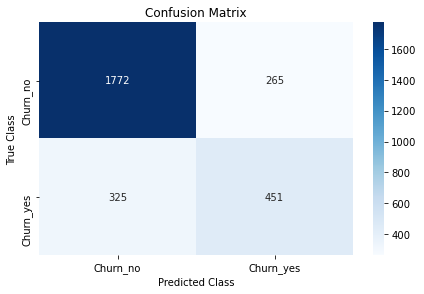

In [44]:
# Plot confusion matrix
class_names = ['Churn_no', 'Churn_yes']
cm_tree = plot_confusion_matrix(
    target_predicted, 
    target_test, 
    class_names, 
    "tree_clf1")

The results from the initial tree indicated only a somewhat useful model. The average performance on the test set suggests the model is still overfitting to the training set.

## Featre Importances

Decision tree models can report relative importances of each feature in achieving the specified target variable. This enables the removal of certain features.

In [29]:
# Print Feature Importances:
for name, score in zip(colnames, tree_clf.feature_importances_):
    print(name, '%.5f' % score)

SeniorCitizen 0.33835
TotalCharges 0.15133
MonthlyCharges 0.09951
tenure 0.12257
PaymentMethod_Electronic check 0.01618
Contract_Two year 0.02456
InternetService_Fiber optic 0.01193
gender_Male 0.02452
PaperlessBilling_Yes 0.01373
TechSupport_Yes 0.01694
Partner_Yes 0.01626
OnlineBackup_Yes 0.01767
Contract_One year 0.01273
OnlineSecurity_Yes 0.02081
DeviceProtection_Yes 0.01723
MultipleLines_Yes 0.01809
Dependents_Yes 0.01381
StreamingMovies_Yes 0.01777
StreamingTV_Yes 0.01527
PaymentMethod_Credit card (automatic) 0.00849
PaymentMethod_Mailed check 0.01515
PhoneService_Yes 0.00707


# Fine Tuning the Model
We will use the grid search cross validation to find some good hyperparameter settings for max_depth and min_samples_leaf.

We do this to avoid overfitting to ensure the model will generalise well to unseen data. For the purpose of the initial decision tree model, the performance is not critical (since we will be fitting an ensemble model in the next part) however by finding good hyperparameters, we will be able to find some robust decision rules, which will in turn tell us some more about the data.

We will use the found parameters to train a second tree classifier.

In [45]:
# Use cross-validation to find good hyperparameter values
from sklearn.model_selection import GridSearchCV

params = {'max_depth': list(range(2, 50)), 'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 10, 15]}
grid_search_cv = GridSearchCV(DecisionTreeClassifier(random_state=42), params, verbose=1, cv=3)

grid_search_cv.fit(features_train, target_train)

# Output result
grid_search_cv.best_estimator_

Fitting 3 folds for each of 432 candidates, totalling 1296 fits
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1296 out of 1296 | elapsed:   16.7s finished


DecisionTreeClassifier(max_depth=4, min_samples_leaf=10, random_state=42)

# Train Tree Classifier 2 with new hyperparameters
We will now run the tree model again with the new hyperparameter settings found above. The same evaluation process was applied.

In [48]:
# Set model hyperparameters
tree_depth = 4
min_in_leaf = 10

# Initialise model
classifier2 = DecisionTreeClassifier(
    max_features="auto",
    random_state=42,
    min_samples_leaf=min_in_leaf,
    max_depth=tree_depth)

# Fit model
tree_clf2 = classifier2.fit(
    features_train, 
    target_train)

# Format output
tree_output = export_text(
    tree_clf2, 
    show_weights=True, 
    feature_names=list(feature_frame.columns))

# Make Predictions
target_predicted2 = tree_clf2.predict(features_test)

print(tree_output)

|--- SeniorCitizen <= 0.50
|   |--- PaperlessBilling_Yes <= 0.50
|   |   |--- Contract_Two year <= 0.50
|   |   |   |--- tenure <= 5.50
|   |   |   |   |--- weights: [203.00, 39.00] class: 0
|   |   |   |--- tenure >  5.50
|   |   |   |   |--- weights: [620.00, 39.00] class: 0
|   |   |--- Contract_Two year >  0.50
|   |   |   |--- TotalCharges <= 6572.45
|   |   |   |   |--- weights: [475.00, 3.00] class: 0
|   |   |   |--- TotalCharges >  6572.45
|   |   |   |   |--- weights: [35.00, 2.00] class: 0
|   |--- PaperlessBilling_Yes >  0.50
|   |   |--- PaymentMethod_Electronic check <= 0.50
|   |   |   |--- Contract_Two year <= 0.50
|   |   |   |   |--- weights: [625.00, 80.00] class: 0
|   |   |   |--- Contract_Two year >  0.50
|   |   |   |   |--- weights: [346.00, 8.00] class: 0
|   |   |--- PaymentMethod_Electronic check >  0.50
|   |   |   |--- TechSupport_Yes <= 0.50
|   |   |   |   |--- weights: [282.00, 110.00] class: 0
|   |   |   |--- TechSupport_Yes >  0.50
|   |   |   |   |--

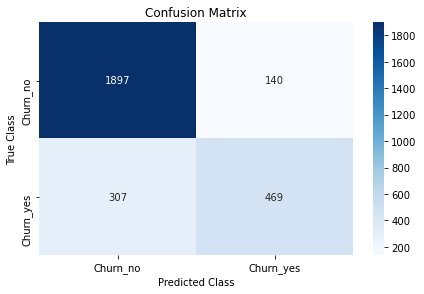

   Precision    Recall  F1 Score  Accuracy
0   0.770115  0.604381  0.677256  0.841095


In [49]:
# Plot confusion matrix
class_names = ['Churn_no', 'Churn_yes']
cm_tree2 = plot_confusion_matrix(
    target_predicted2, 
    target_test, 
    class_names, 
    "tree_clf2")

# Print Metrics
metrics_tree2 = calculate_metrics(target_predicted2, target_test)
print(metrics_tree2)

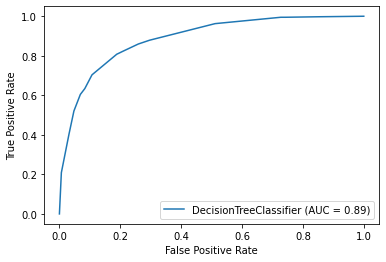

In [50]:
# Plot ROC curve
plot_roc_curve(tree_clf2, features_test, target_test)
plt.show()    

# Final Evaluation and Insights Gained

The model performed significantly better after tuning, as well as outputting a smaller tree.
Some of the basic rules relating a customer's behaviour with their likelihood to churn are given below.

## Rules for churn:

The following groups of customers have a high likelohood of churning:
- Senior citizens with no device protection and less than 27.6 months tenure
- Senior citizens who have device protection, are not on a one-year contract and have no online backup


## Rules for no churn:

The following groups of customers have a low likelihood of churning:
- If the member is not a senior citizen. This is consistent with the insights from the EDA stage.
- Senior citizens with no device protection who have over 59.5 months tenure also have a low likelihood of churning.

These results are consistent with the insights from the EDA stage, feature correlations and feature importance outputs.
